In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

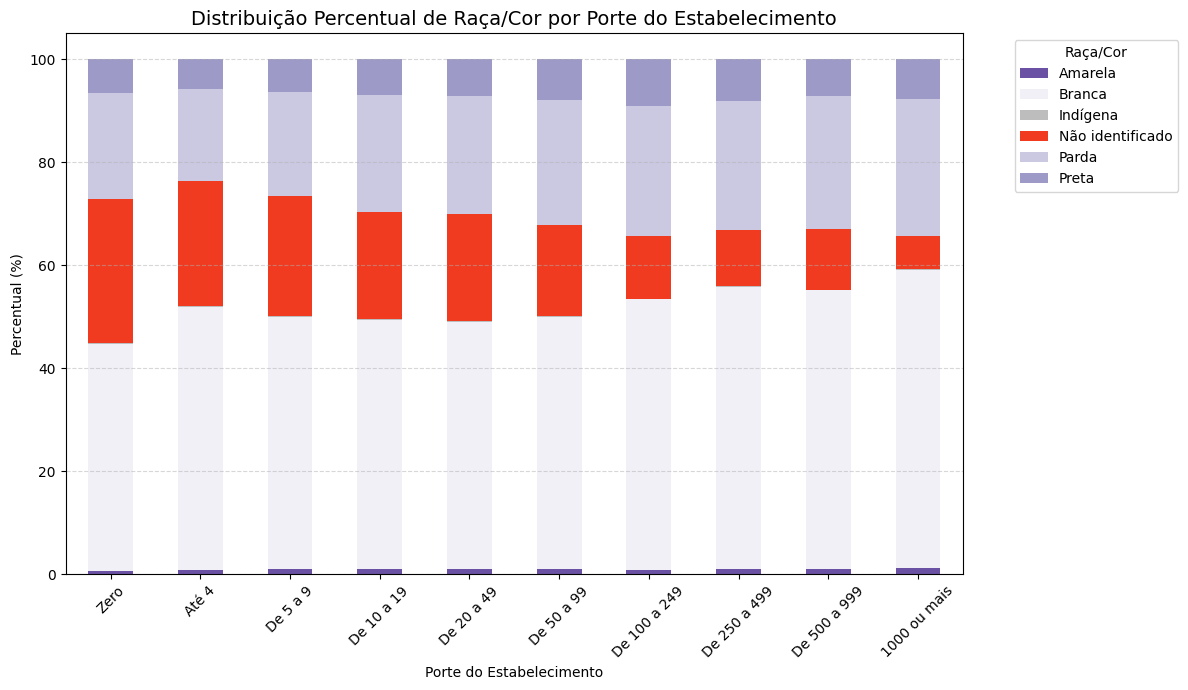

In [ ]:
# Query usada para gerar esses dados, apenas para referencia.
# Os dados foram extraidos do BigQuery e armazenados localmente em um CSV.
QUERY = '''
SELECT
  base.tamanho_estabelecimento,
  dici.valor AS porte_estab,
  dici_cor.valor as raca_cor,
  COUNT(*) AS total
FROM `basedosdados.br_me_rais.microdados_vinculos` as base
LEFT JOIN basedosdados.br_me_rais.dicionario as dici
  ON nome_coluna = 'tamanho_estabelecimento'
  AND id_tabela = 'microdados_vinculos'
  AND dici.chave = base.tamanho_estabelecimento
LEFT JOIN basedosdados.br_me_rais.dicionario as dici_cor
  ON dici_cor.nome_coluna = 'raca_cor'
  AND dici_cor.id_tabela = 'microdados_vinculos'
  AND dici_cor.chave = base.raca_cor
WHERE id_municipio_trabalho = '3509502'
  AND ano = 2023
GROUP BY ALL
ORDER BY base.tamanho_estabelecimento ASC, raca_cor
'''

file_path = "./qtd_por_raca_tamanho_estabelecimento.csv"
df = pd.read_csv(file_path)


# Pivot para gráfico empilhado
pivot = df.pivot_table(index="porte_estab", columns="raca_cor", values="total", aggfunc="sum").fillna(0)

# Converte os totais para percentuais
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Ordenar por tamanho de estabelecimento para visualização coerente
order = ["Zero", "Até 4", "De 5 a 9", "De 10 a 19", "De 20 a 49", 
         "De 50 a 99", "De 100 a 249", "De 250 a 499", "De 500 a 999", "1000 ou mais"]
pivot_pct = pivot_pct.loc[order]

# Cores customizadas
cores = {
    "Branca": "#f2f0f7",
    "Parda": "#cbc9e2",
    "Preta": "#9e9ac8",
    "Amarela": "#6a51a3",
    "Indígena": "#bdbdbd",
    "Não identificado": "#f03b20"
}

# Plot
pivot_pct.plot(kind="bar", stacked=True, figsize=(12, 7), color=[cores[col] for col in pivot_pct.columns])

plt.title("Distribuição Percentual de Raça/Cor por Porte do Estabelecimento", fontsize=14)
plt.ylabel("Percentual (%)")
plt.xlabel("Porte do Estabelecimento")
plt.legend(title="Raça/Cor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


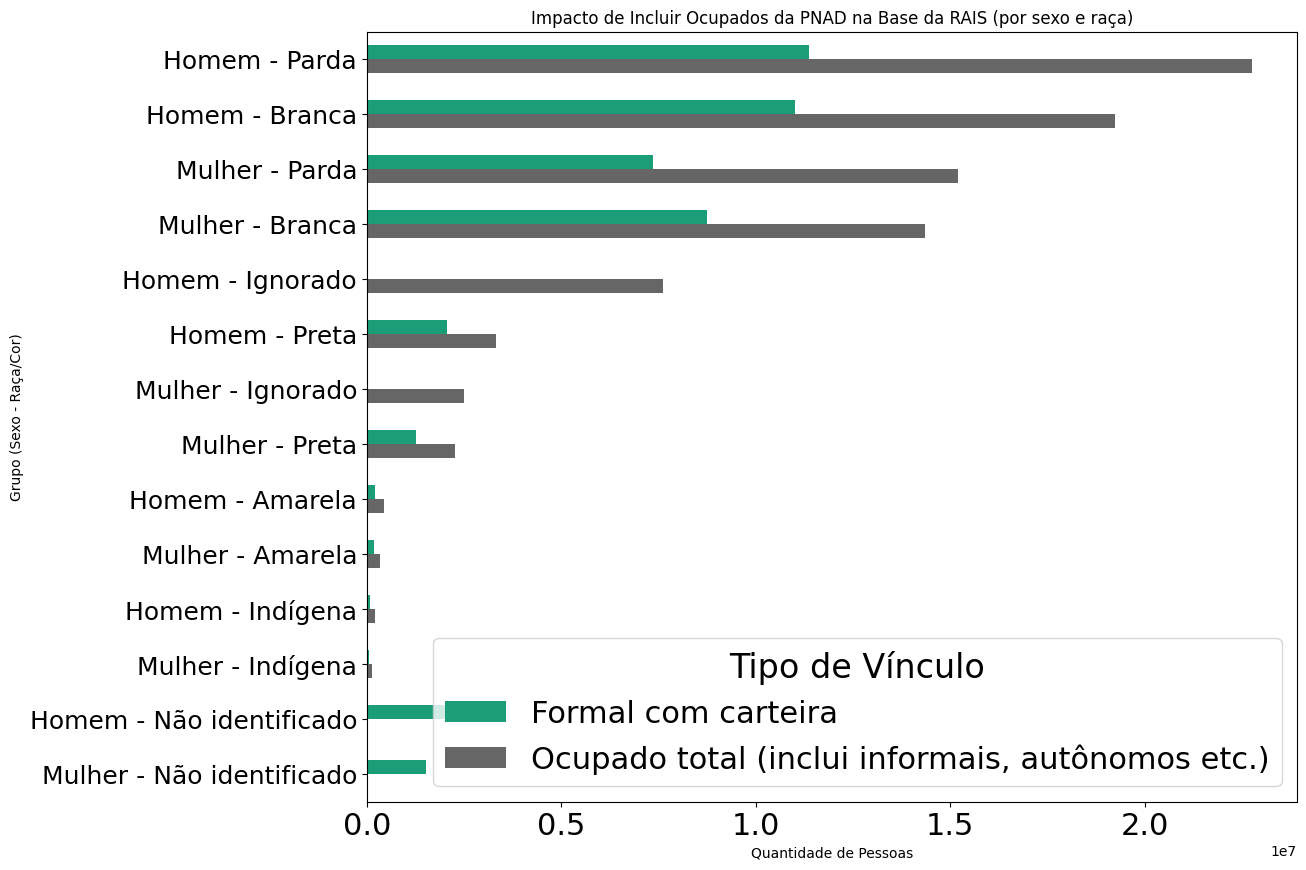

In [ ]:
# Query usada para gerar esses dados, apenas para referencia.
# Os dados foram extraidos do BigQuery e armazenados localmente.
QUERY = '''
WITH dicionario_VD4009 AS (
    SELECT
        chave AS chave,
        valor AS descricao
    FROM `basedosdados.br_ibge_pnadc.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'VD4009'
        AND id_tabela = 'microdados'
),

dicionario_V2007 AS (
    SELECT
        chave AS chave,
        valor AS descricao
    FROM `basedosdados.br_ibge_pnadc.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'V2007'
        AND id_tabela = 'microdados'
),

dicionario_V2010 AS (
    SELECT
        chave AS chave,
        valor AS descricao
    FROM `basedosdados.br_ibge_pnadc.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'V2010'
        AND id_tabela = 'microdados'
)

SELECT
  d_v2007.descricao as sexo,
  d_v2010.descricao AS cor_raca,
  CASE
    WHEN vd4009 IN ('1', '3', '5') THEN "Formal com carteira"
    ELSE "Ocupado total (inclui informais, autônomos etc.)"
  END AS tipo_vinculo,
  COUNT(*) AS qtd_pessoas
FROM `basedosdados.br_ibge_pnadc.microdados` AS base
LEFT JOIN dicionario_VD4009 AS d_vd4009 ON base.VD4009 = d_vd4009.chave
LEFT JOIN dicionario_V2007 AS d_v2007 ON base.V2007 = d_v2007.chave
LEFT JOIN dicionario_V2010 AS d_v2010 ON base.V2010 = d_v2010.chave
WHERE
  base.VD4002 = '1'  -- condição de pessoa ocupada
  AND base.VD4009 IS NOT NULL
  AND base.V2007 IS NOT NULL
  AND base.V2010 IS NOT NULL
  AND base.ano = 2024
--   and base.rm_ride = '35' -- Região Metropolitana de São Paulo
GROUP BY ALL
ORDER BY
  3, 1, 2;
'''



# Depois de normalizados, temos:
normalized_data = [
    # PNAD - Ocupado total
    ('PNAD', 'Homem', 'Amarela', 'Ocupado total (inclui informais, autônomos etc.)', 436093),
    ('PNAD', 'Homem', 'Branca', 'Ocupado total (inclui informais, autônomos etc.)', 19227929),
    ('PNAD', 'Homem', 'Ignorado', 'Ocupado total (inclui informais, autônomos etc.)', 7602175),
    ('PNAD', 'Homem', 'Indígena', 'Ocupado total (inclui informais, autônomos etc.)', 205346),
    ('PNAD', 'Homem', 'Parda', 'Ocupado total (inclui informais, autônomos etc.)', 22766598),
    ('PNAD', 'Homem', 'Preta', 'Ocupado total (inclui informais, autônomos etc.)', 3322058),
    ('PNAD', 'Mulher', 'Amarela', 'Ocupado total (inclui informais, autônomos etc.)', 335038),
    ('PNAD', 'Mulher', 'Branca', 'Ocupado total (inclui informais, autônomos etc.)', 14353225),
    ('PNAD', 'Mulher', 'Ignorado', 'Ocupado total (inclui informais, autônomos etc.)', 2504175),
    ('PNAD', 'Mulher', 'Indígena', 'Ocupado total (inclui informais, autônomos etc.)', 146472),
    ('PNAD', 'Mulher', 'Parda', 'Ocupado total (inclui informais, autônomos etc.)', 15192682),
    ('PNAD', 'Mulher', 'Preta', 'Ocupado total (inclui informais, autônomos etc.)', 2263144),
    # RAIS - Formal com carteira
    ('RAIS', 'Homem', 'Amarela', 'Formal com carteira', 211237),
    ('RAIS', 'Homem', 'Branca', 'Formal com carteira', 11017529),
    ('RAIS', 'Homem', 'Não identificado', 'Formal com carteira', 2389255),
    ('RAIS', 'Homem', 'Indígena', 'Formal com carteira', 76246),
    ('RAIS', 'Homem', 'Parda', 'Formal com carteira', 11378740),
    ('RAIS', 'Homem', 'Preta', 'Formal com carteira', 2067781),
    ('RAIS', 'Mulher', 'Amarela', 'Formal com carteira', 174604),
    ('RAIS', 'Mulher', 'Branca', 'Formal com carteira', 8739427),
    ('RAIS', 'Mulher', 'Não identificado', 'Formal com carteira', 1530329),
    ('RAIS', 'Mulher', 'Indígena', 'Formal com carteira', 44903),
    ('RAIS', 'Mulher', 'Parda', 'Formal com carteira', 7369318),
    ('RAIS', 'Mulher', 'Preta', 'Formal com carteira', 1271145)
]

# Criar DataFrame
df = pd.DataFrame(normalized_data, columns=['fonte', 'sexo', 'cor_raca', 'tipo_vinculo', 'qtd_pessoas'])
df['grupo'] = df['sexo'] + ' - ' + df['cor_raca']

# Pivotar os dados para formato de gráfico
df_pivot = df.pivot_table(index='grupo', columns='tipo_vinculo', values='qtd_pessoas', aggfunc='sum').fillna(0)

# Ordenar para visualização consistente
df_pivot = df_pivot.sort_values(by='Ocupado total (inclui informais, autônomos etc.)', ascending=False)

# Plotar gráfico
ax = df_pivot.plot(kind='barh', figsize=(12, 10), colormap='Dark2')
plt.title('Impacto de Incluir Ocupados da PNAD na Base da RAIS (por sexo e raça)')
plt.xlabel('Quantidade de Pessoas')
plt.ylabel('Grupo (Sexo - Raça/Cor)')

plt.xticks(fontsize=22)
plt.yticks(fontsize=18)

plt.legend(title='Tipo de Vínculo', fontsize=22, title_fontsize=24)
# plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

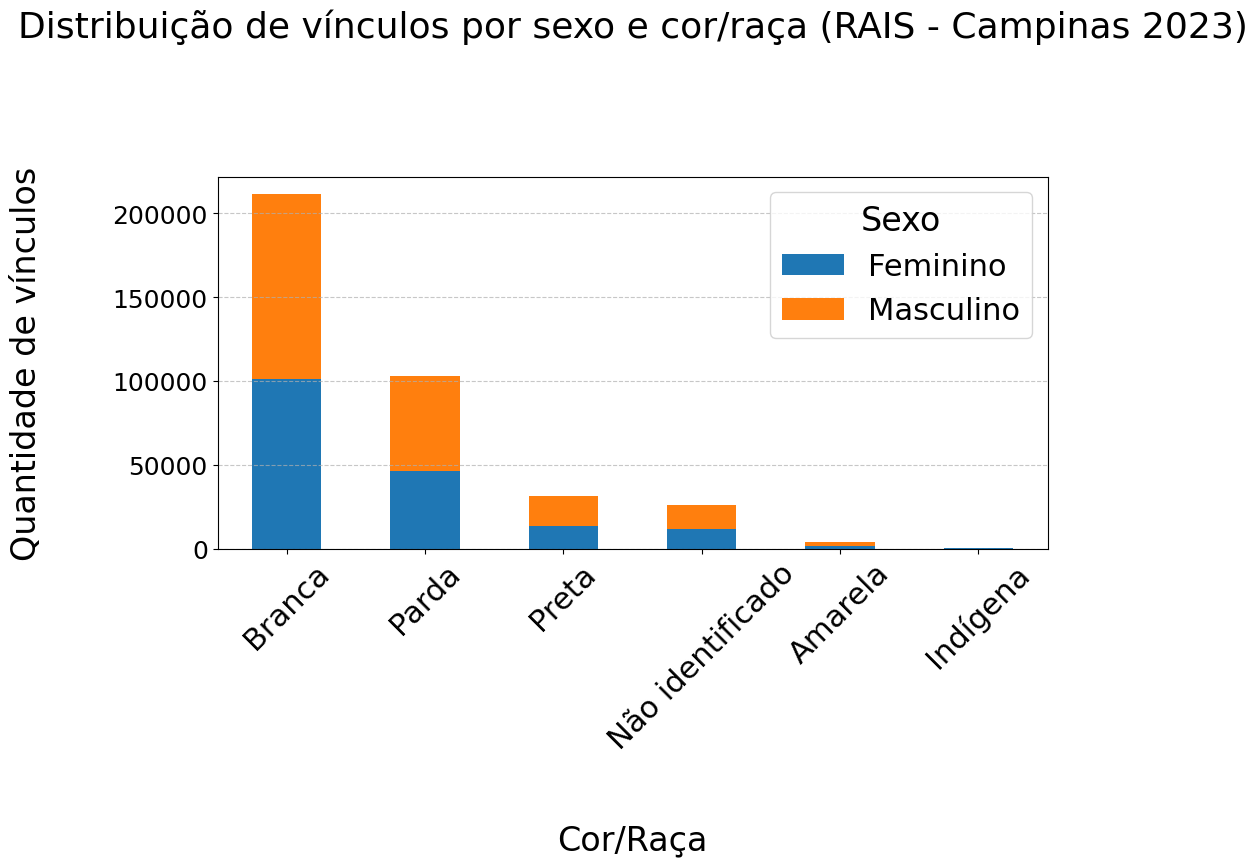

In [ ]:
# Query usada para gerar esses dados, apenas para referencia.
# Os dados foram extraidos do BigQuery e armazenados localmente.
QUERY = '''
SELECT
  dici_sexo.valor as sexo,
  dici_cor.valor as raca_cor,
  COUNTIF(vinculo_ativo_3112 = '1') AS qtd_vinculos,
  ROUND(100 * COUNTIF(vinculo_ativo_3112 = '1') / COUNT(*), 2) AS pct_vinculos
FROM `basedosdados.br_me_rais.microdados_vinculos` as base
LEFT JOIN basedosdados.br_me_rais.dicionario as dici_sexo
  ON dici_sexo.nome_coluna = 'sexo'
  AND dici_sexo.id_tabela = 'microdados_vinculos'
  AND dici_sexo.chave = base.sexo
LEFT JOIN basedosdados.br_me_rais.dicionario as dici_cor
  ON dici_cor.nome_coluna = 'raca_cor'
  AND dici_cor.id_tabela = 'microdados_vinculos'
  AND dici_cor.chave = base.raca_cor
WHERE id_municipio_trabalho = '3509502'
  AND ano = 2024
GROUP BY ALL
ORDER BY pct_vinculos DESC;
'''

df = pd.read_csv('./qtd_por_raca_sexo.csv')
df_pivot = df.pivot(index='raca_cor', columns='sexo',
                    values='qtd_vinculos').fillna(0)
df_pivot = df_pivot.loc[df_pivot.sum(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(10, 6))  # pega fig e ax
df_pivot.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

ax.set_title(
    'Distribuição de vínculos por sexo e cor/raça (RAIS - Campinas 2023)',
    fontsize=26,
    pad=100              # espaço entre título e gráfico
)
ax.set_xlabel('Cor/Raça', fontsize=24, labelpad=50)      # espaço eixo X
ax.set_ylabel('Quantidade de vínculos', fontsize=24, labelpad=50)  # espaço eixo Y

ax.tick_params(axis='x', labelrotation=45, labelsize=22)
ax.tick_params(axis='y', labelsize=18)

ax.legend(title='Sexo', fontsize=22, title_fontsize=24)

ax.grid(axis='y', linestyle='--', alpha=0.7)

# ajusta margens gerais (top menor => mais espaço p/ título)
fig.subplots_adjust(top=0.82, left=0.12, bottom=0.2, right=0.95)

plt.show()
